## Criação de Circuitos

In [39]:
# Visualizar as propriedades do circuito

from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.x(0)

print(qc.qubits)
print(qc.data)

qc.draw()


[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]


┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

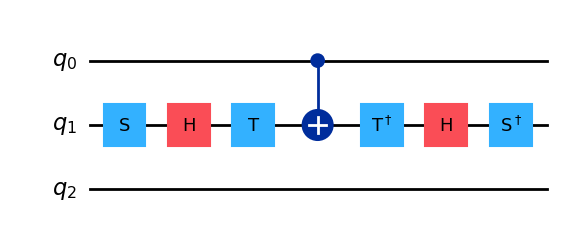

In [106]:
# decompose - decompõe as portas lógicas em portas fundamentais

from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.ch(0,1) # controle hadamard

qc.decompose().draw('mpl')

Instruction(name='mcx', num_qubits=5, num_clbits=0, params=[])


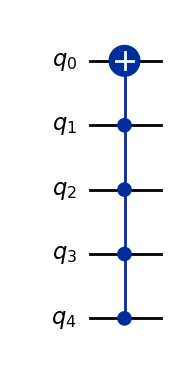

In [ ]:
# Append 

from qiskit.circuit.library import MCXGate
from qiskit import QuantumCircuit
gate = MCXGate(4)
print(gate)

circuit = QuantumCircuit(5)
circuit.append(gate, [4, 1, 2, 3, 0])
circuit.draw('mpl')

In [77]:
# Visualizar em forma de matrix e modificar as portas
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
gate = qc.data[0].operation
print(gate.to_matrix())             
print()

from qiskit.circuit.library import ZGate
gate = ZGate()
print(gate.to_matrix())             # X gate
print()
print(gate.power(1/2).to_matrix())  # √X gate
print()
print(gate.control(1).to_matrix())  # CX (controlled X) gate

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

[[1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17+1.j]]

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
     ┌───┐
q_0: ┤ Y ├
     ├───┤
q_1: ┤ Z ├
     └───┘


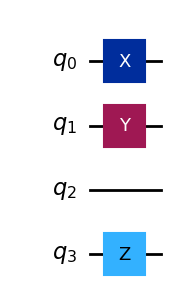

In [ ]:
# Compose - juntar dois circuitos
from qiskit import QuantumCircuit

qc_a = QuantumCircuit(4)
qc_a.x(0)
print(qc_a)

qc_b = QuantumCircuit(2)
qc_b.y(0)
qc_b.z(1)
print(qc_b) 

# adiciona os qubits de B nas linhas 1 e 3 de A
combined = qc_a.compose(qc_b, qubits=[1, 3]) # cria um circuito novo, para modificar um circuito use inplace = True
combined.draw("mpl")

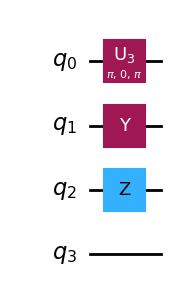

In [103]:
# to_instrucion - transforma um circuito em uma instrução
from qiskit import QuantumCircuit

qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name = "B")
qc_b.y(0)
qc_b.z(1)

inst = qc_b.to_instruction()
qc_a.append(inst, [1, 2])
qc_a.decompose().draw("mpl")

# 0 = qubit 0 de b

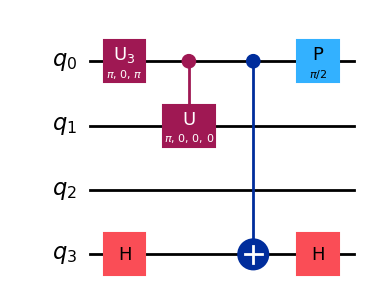

In [102]:
# to_gate - transforma um circuito em uma porta lógica se for unitário (opções diferentes que instruções)
from qiskit import QuantumCircuit

qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name = "B")
qc_b.y(0)
qc_b.z(1)

gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.decompose().draw("mpl")


In [ ]:
# 